In [30]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('../data/clean_data.csv')
df.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,1,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,2,1,736.0,F,0,S,Juanna,Vines,1,Earth
2,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,3,1,10383.0,A,0,S,Altark,Susent,2,Europa
3,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,3,2,5176.0,A,0,S,Solam,Susent,2,Europa
4,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,4,1,1091.0,F,1,S,Willy,Santantines,1,Earth


In [32]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,passenger_group,passenger_number_in_group,total_luxury_amenities,num,group_size
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.00000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,4633.389624,1.517773,1440.866329,603.42678,2.035546
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2671.028856,1.054241,2803.045694,506.36841,1.596347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,0.000000,173.00000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000,716.000000,448.00000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,6883.000000,2.000000,1441.000000,983.00000,3.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,35987.000000,1894.00000,8.000000


Text(0.5, 1.0, '"Target distribution: Transported"')

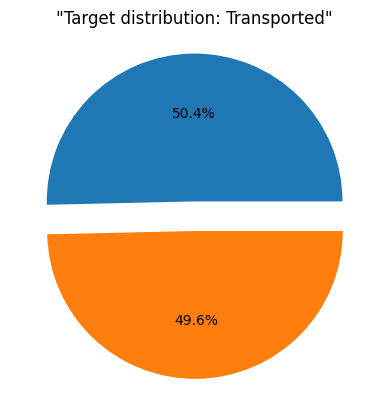

In [33]:
plt.pie(df['Transported'].value_counts(), explode=[0.1,0.1], autopct='%1.1f%%')
plt.title('"Target distribution: Transported"')

In [34]:
categorical_columns = df.select_dtypes(exclude = [int, float])
categorical_columns.columns

Index(['CryoSleep', 'Destination', 'VIP', 'Name', 'Transported', 'deck',
       'side', 'first name', 'last name', 'HomePlanet'],
      dtype='object')

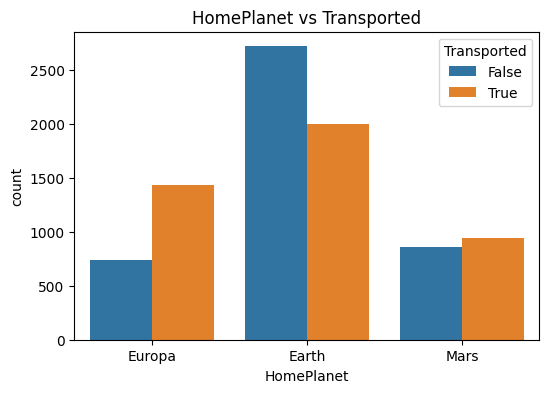

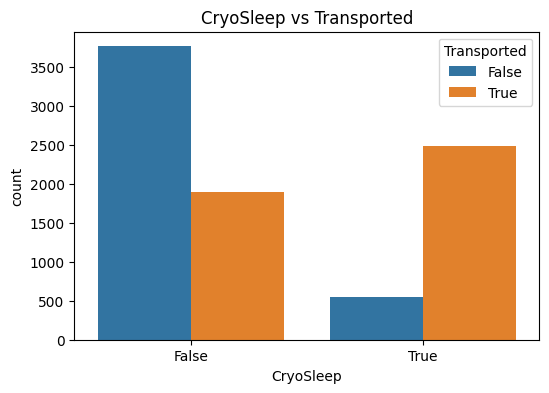

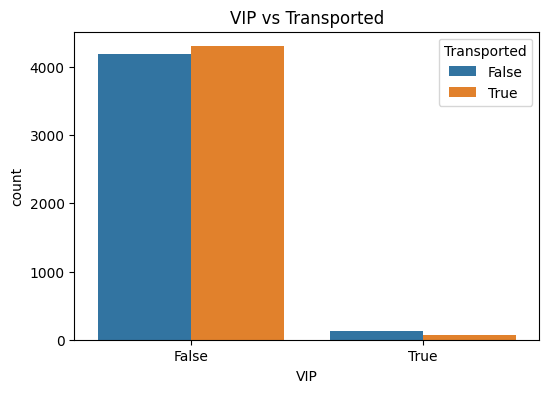

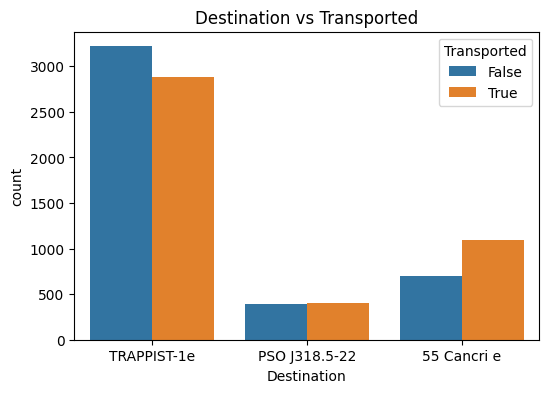

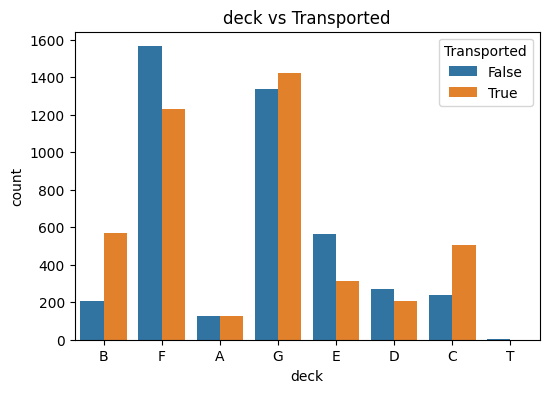

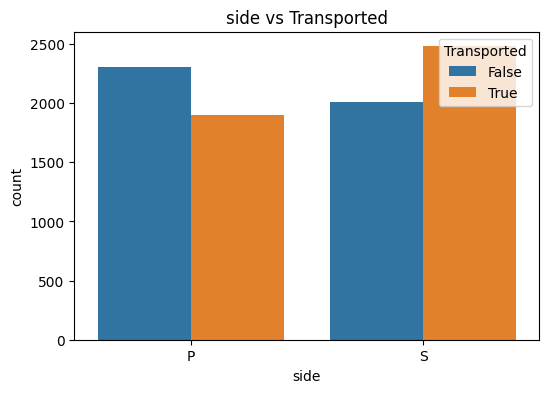

In [35]:
categorical_cols = ['HomePlanet','CryoSleep','VIP','Destination','deck','side']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Transported')
    plt.title(f"{col} vs Transported")
    plt.show()

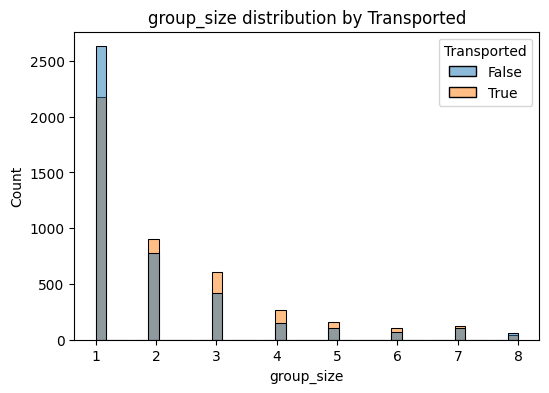

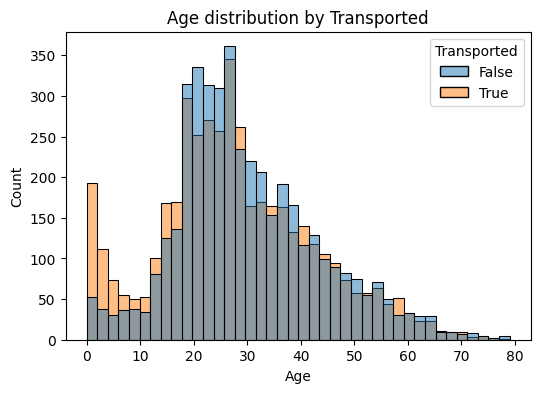

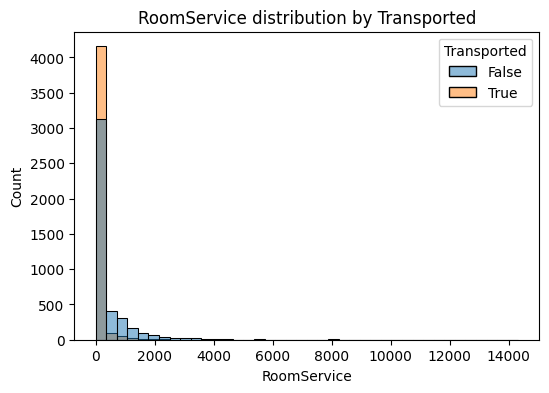

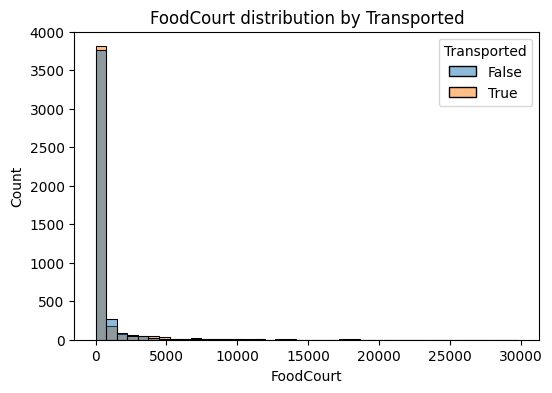

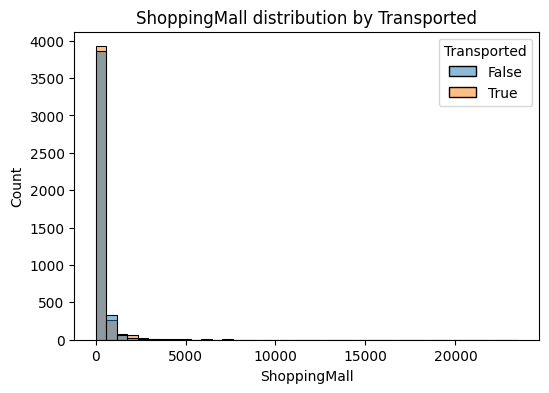

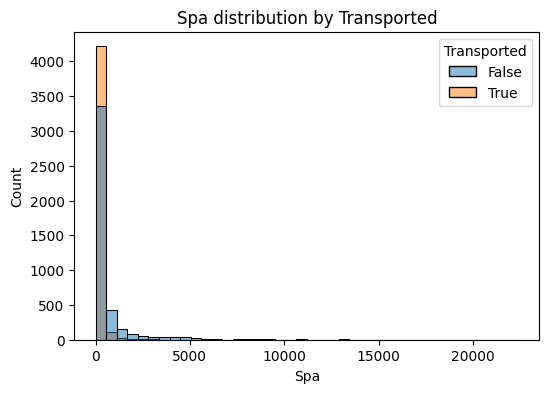

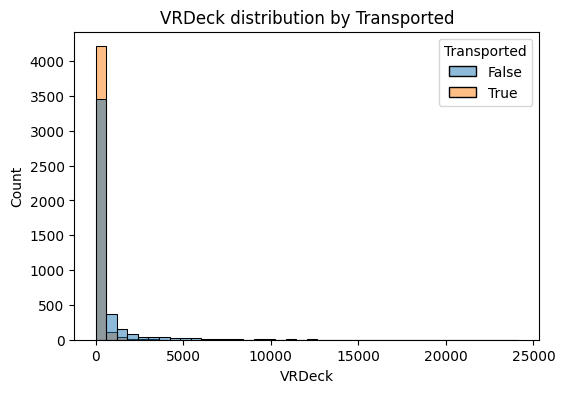

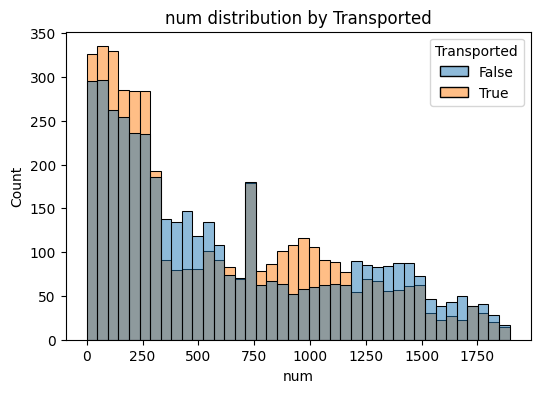

In [41]:
numeric_cols = ['group_size','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','num']
df[numeric_cols].describe()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Transported', bins=40, kde=False)
    plt.title(f"{col} distribution by Transported")
    plt.show()

In [42]:
def cabin_number_distribution(chunk):
    if chunk < 300:
        return 'chunk1'
    if chunk > 301 & chunk <600:
        return 'chunk2'
    if chunk > 601 & chunk < 1150:
        return 'chunk3'
    return 'chunk4'
    
df['cabin_number_distribution_chunk'] = df['num'].apply(cabin_number_distribution)

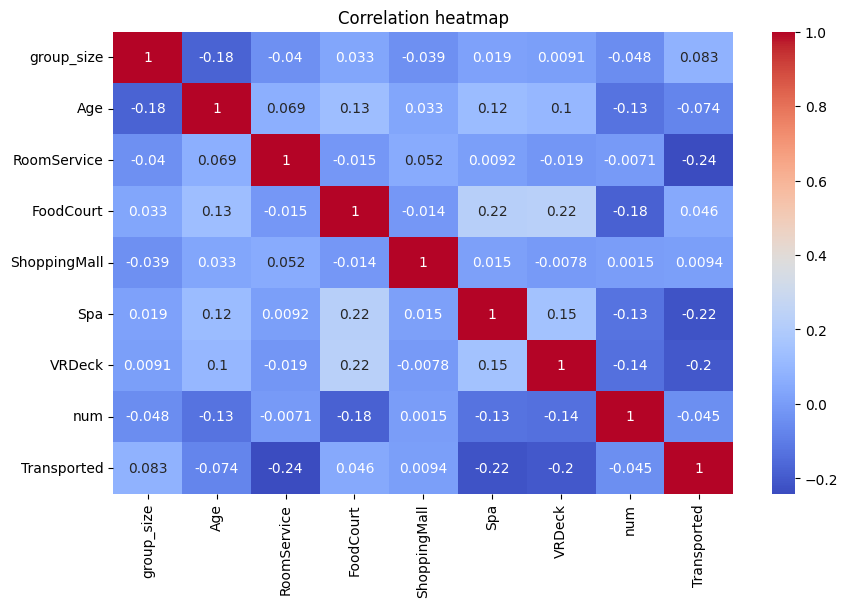

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols + ['Transported']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [38]:
df.head(5)

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,1,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,2,1,736.0,F,0,S,Juanna,Vines,1,Earth
2,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,3,1,10383.0,A,0,S,Altark,Susent,2,Europa
3,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,3,2,5176.0,A,0,S,Solam,Susent,2,Europa
4,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,4,1,1091.0,F,1,S,Willy,Santantines,1,Earth


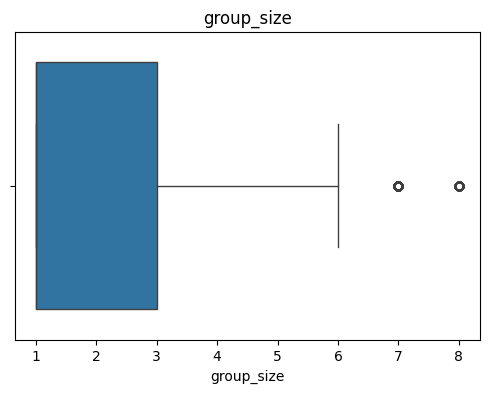

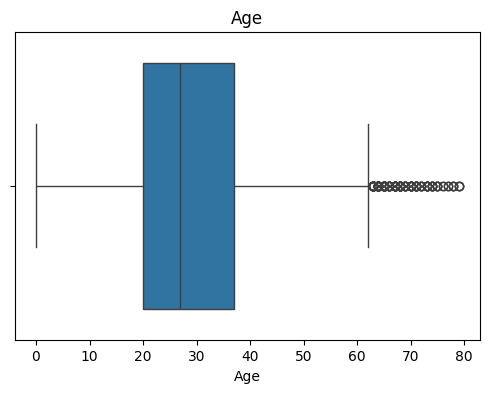

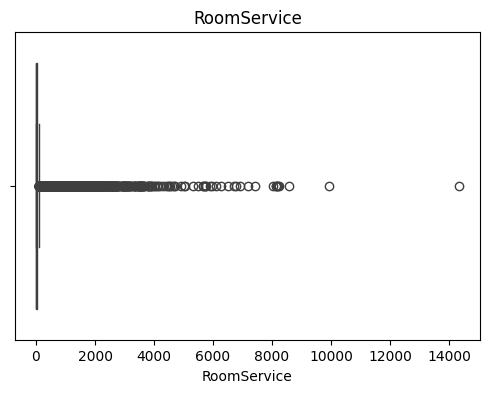

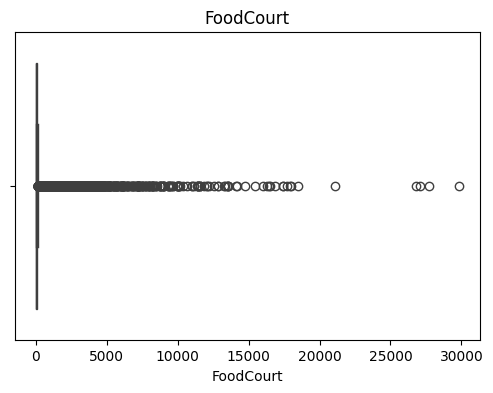

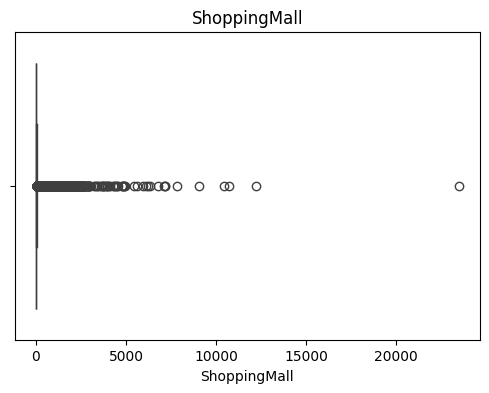

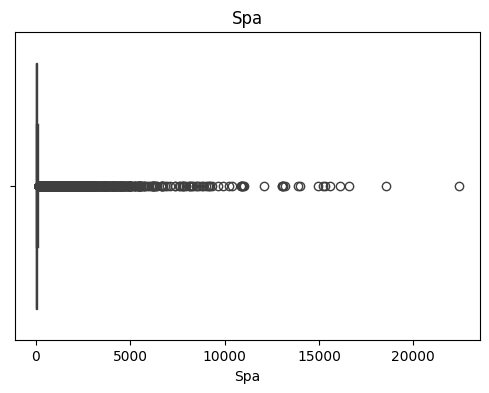

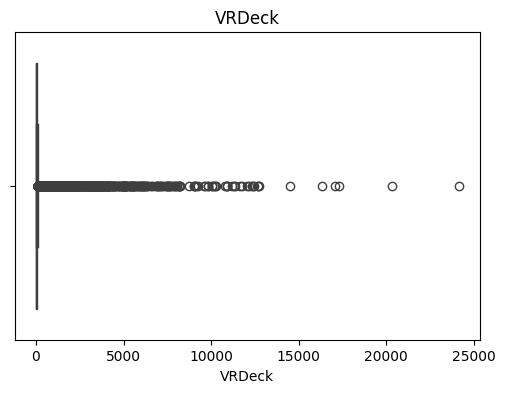

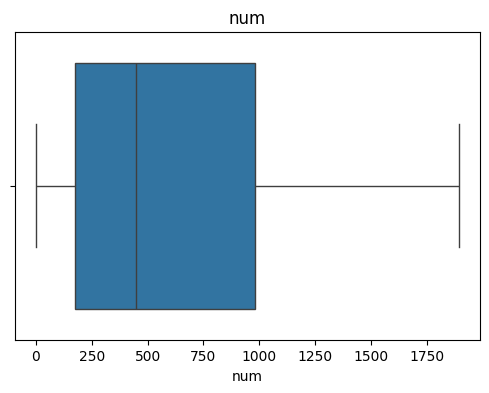

In [39]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col}")
    plt.show()

In [40]:
df.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,passenger_group,passenger_number_in_group,total_luxury_amenities,deck,num,side,first name,last name,group_size,HomePlanet
0,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,1,0.0,B,0,P,Maham,Ofracculy,1,Europa
1,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,2,1,736.0,F,0,S,Juanna,Vines,1,Earth
2,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,3,1,10383.0,A,0,S,Altark,Susent,2,Europa
3,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,3,2,5176.0,A,0,S,Solam,Susent,2,Europa
4,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,4,1,1091.0,F,1,S,Willy,Santantines,1,Earth
